<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Independent Practice

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

## Walmart Sales Data

For this independent practice, we'll analyze Walmart's weekly sales data over a two-year period from 2010 to 2012.

The data set is again separated by store and department, but we'll focus on analyzing one store for simplicity.

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: The week.
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

### 1) Preprocess the data using Pandas.

* **Load the data.**
* **Convert the `Date` column to a `datetime` object.**
* **Set `Date` as the index of the DataFrame.**

In [3]:
walmart = pd.read_csv('data/train.csv')

In [4]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
walmart['Date'] = pd.to_datetime(walmart['Date'])

In [6]:
walmart.set_index('Date', inplace=True)

In [7]:
walmart.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


### 2) Filter the DataFrame to Store 1 sales and aggregate over departments to compute the total weekly sales per store. Store this in a new DataFrame.

In [19]:
store1 = walmart[walmart.Store == 1][['Weekly_Sales']].resample('W').sum()

In [20]:
store1.head()

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


### 3) Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

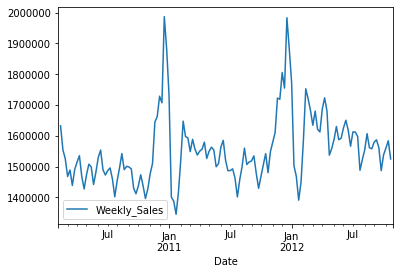

In [21]:
store1.rolling(window=3, center=True).mean().plot()

### 4) Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [23]:
store1.Weekly_Sales.autocorr(lag=1)

0.3021582794113126

In [24]:
store1.Weekly_Sales.autocorr(lag=13)

0.10169228501987719

In [25]:
store1.Weekly_Sales.autocorr(lag=52)

0.8953760294777008

### 5) Create a decomposition plot for the Store 1 sales data. 

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(store1.Weekly_Sales, period=52)

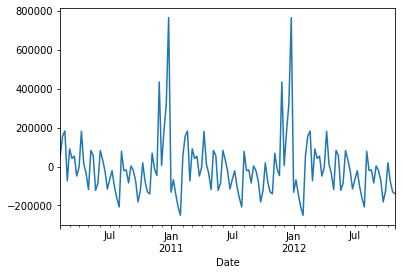

In [40]:
decomposition.seasonal.plot()


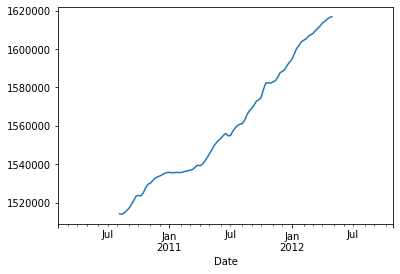

In [41]:
decomposition.trend.plot()

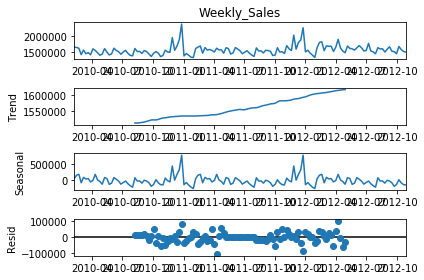

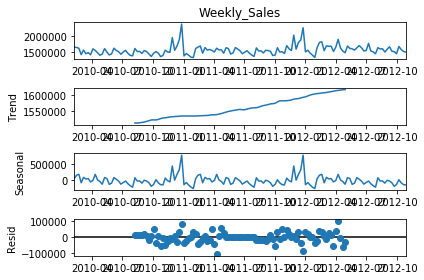

In [42]:
decomposition.plot()

### 6) Based on the analyses above, what can we deduce about this time series?